# Introduction to Reinforcement Learning

Most of you have probably heard of AI learning to play games on their own, like the one shown below in the video. Algorithms behind this and other similar models are call Reinforcement Learning Algorithm. That's a new paradigm in the Machine Learning world and that's completely different from conventional Supervised and Unsupervised Algorithms. These algorithms are inspired by the way Humans and Animals learn. 

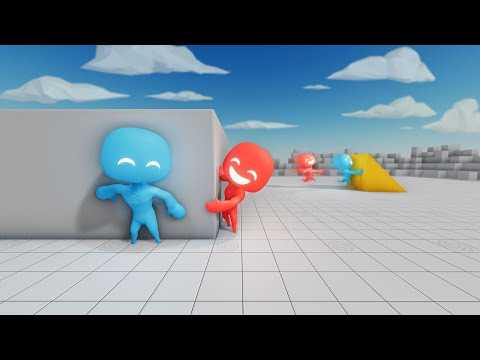

In [59]:
from IPython.display import YouTubeVideo
YouTubeVideo('kopoLzvh5jY', width=900, height=500)

Post your doubt/feedback/discussion in our FB group unit [here](https://www.facebook.com/groups/colearninglounge/learning_content/?filter=471702823590059) in the appropriate section.

***

### Table of content:

* Introduction
* Reinforcement Learning Applications
* Reinforcement Learning Analogy
* Concepts and Terminology
* Markov Desicion Process
  * Components of MDP
  * Markov Property
* Bellman Equation
* Introduction to OpenAI Gym Environments
* Hands-on with Toy Environment
  * Library Imports
  * Introduction to Toy Environment
  * Initial Exploration of the Environment
* Type of Reinforcement Learning Algorithms
* Introduction to Q-Learning
  * Understanding Q-Value Update
* Agent Training with Q-Learning
* Policy Evaluation
* Brief info about Deep Q-Learning
* Summary
* Credits

# Reinforcement Learning Applications

![Application Venn Dia.png](images/VennDia.png) 

<center> "Reinforcement Learning venn diagram by David Silver"</center>


# Reinforcement Learning Analogy

Think of the scenario of teaching your **pet** a new skill. The pet won't understand language humans speak, so we can't instruct a pet what to do. 

So, what do we do?. We can try to give different **signals** to our pet, and the pet tries to respond in many different ways. 

If the pet's response is the desired one, it gets rewarded with food. So, the next time the pet is exposed to similar signals, the pet executes a similar action in expectation of more food. 

That's like learning **"what to do"** from **_positive_** experiences. Similarly, pets will tend to learn **"what not to do"** when faced with **_negative_** experiences.

That's the intuition behind most of the reinforcement learning algorithms.

#### Analogy with Reinforcement Learning Concepts

* Your pet is an "agent" that is exposed to the environment. 
* The environment could be your house including you.
* The situations they encounter are analogous to a state. 
  An example of a state could be your pet standing and you give a visual or audio signal like speaking specific word in a particular tone
* Our agent react by performing an action to transition from one "state" to another "state," 
  Your pet tries come towards you, for example.
* After the transition, it may receive a reward or penalty in return.
* The policy is the strategy of choosing an action given a state in expectation of better outcomes.
  Like you pet learning to perform cetain action given that signal in this case.

# Reinforcement Concepts and Terminologies
Some important terms related to reinforcement learning are (These terms are taken from Steeve Huang's post on Introduction to Various Reinforcement Learning Algorithms. Part I)-

![Agent_Environment_Interface](images/Agent_Environment_Interface.png)

<center> "Agent Environment Interface</center>
<center> Source: Reinforcement Learning: An Introduction (Sutton, R., Barto A.). </center>

#### Environment: 
Physical environment in which the agent operates. This is the main premise of Reinforcement Learning where agent directly interacts with the Environment and gain rewards/penalties. 

#### Agent: 
A hypothetical entity which performs actions in an environment to gain some reward/penalty. Agent learns to perform desired action in based on it's past experience with the environment. Reinforcement Learning algorithms actually powers this learning.

#### Action (a): 
All the possible actions that the agent can perform in a given environment.

#### State (s): 
Representation of the environment at a given timestep t. As agent performs different action on environment, the state of environment changes and agent will take a different action based on new state.

#### Reward (R): 
Reward is response of the environment for the action agent has performed. A reward can be -ve as well, which can be considered penalty. Reward can be immediate or can be delayed as well, based on the environment.

#### Policy (π): 
The strategy that the agent employs to determine next action based on the current state. Agent actually tries to learn the optimal policy over time to receive best possible cummulative reward.

#### Value (V): 
Expected long-term return with discount, as opposed to the short-term. The future reward that an agent would receive by being in a particular state.
Vπ(s) is defined as the expected long-term return of the current state “s” under policy π.

#### Q-value or action-value (Q): 
Q-value is similar to Value, except that it takes an extra parameter, the current action a. Qπ(s, a) refers to the long-term return of the current state s, taking action a under policy π.

***

## Markov Decision Process

A **_Markov decision process (MDP)_** is a discrete time stochastic control process. It provides a **mathematical framework** for modeling **decision making** in situations where outcomes are partly random and partly under the control of a decision maker.

### Components of MDP

A Markov decision process is a 4-tuple $(S,A,P_{a},R_{a})$, where

* $S$ is a finite set of states,
* Initial State: $s_{0}$
* $A$ is a finite set of actions (alternatively, $A_{s}$ is the finite set of actions available from state $s$),
* $P_{a}(s,s')=Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)$ is the probability that action $a$ in state $s$ at time $t$ will lead to state $s'$ at time $t+1$,
    This is also known as **"transition model"** in some literature
* $R_{a}(s,s')$ is the immediate reward (or expected immediate reward) received after transitioning from state $s$ to state $s'$, due to action $a$

### Markov Property

> <span style="font-family:Sans-serif; font-size:2em;">“ The future is independent of the past given the present.” </span>

In mathematical terms, a state St has the **Markov property**, _if and only if_;  

\begin{align}
P[St+1 | St] = P[St+1 | S1, ….. , St],
\end{align}

the state captures all relevant information from history.

---

### Bellman Equation

Before getting to Bellman Equation we need to understand a Utility/Value of a state

But first let's understand value of a state sequence

$$
V(h) = R(s_{0}) + \gamma R(s_{1}) + \gamma^{2} R(s_{2}) + ... + \gamma^{n} R(s_{n})
$$

Here we introduce a new term $\gamma$, which is called **Discount Factor**. Where $\gamma \in [0,1]$

> Summarized

$$
V(s) = \sum_{t=0}^{\infty}\gamma^{t}R(s_{t})
$$

One key point to note here is that this value of a state is with respect to a given policy. So, now that we understand value of a state, how can agent select the best action to be taken to in a givent state. That can be done throug something called **Maximum Expected Value** principle, which essentially mean that agent should take action that maximises its expected value.
We are a step closer to the Bellman equation. So now we need add action $a$ also to the mix. Going back to components of MDP, we can find the probablity of the action $a$ in state $s$ will lead to state $s'$.

Adding all these to gether we get our final Bellman Equation

$$
V(s) = R(s) + \gamma\max_{a}\sum_{s'}P_{a}(s,s')V(s')
$$


Let’s try to dissect this equation. **First**, the term $R(s)$ is something we have to add for sure in the equation. We are in state $s$ and we know the reward given for that state, the value function must take it into account. **Second**, notice that the equation is using the probability model (transition model) $P$ which is multiplied times the value of the next state $s′$. If you think about that it makes sense, a state which has a low probability to happen will have a lowest weight in the summation.

## OpenAI Gym Environments

> Gym is a toolkit for developing and comparing reinforcement learning algorithms. [Open AI Gym](https://gym.openai.com/)

Gym provides variety of Environments to explore, starting with simple text based environments to the interesting world of Atari Games.

## Types of Environments

![Types of Environments](images/types_of_envs_s.png)


## Introduction to a Toy Environment

![Grid World](images/reinforcement_learning_simple_world.png)
<center> Source : Dissecting Reinforcement Learning (Massimiliano Patacchiola) </center>


An Environment should contain following components for agent to interact with it.

* **Observation Space** :  This is nothing but list of states for an environment. In Grid world example we have 4x3 grid so we have 12 distinct states.

* **Action Space** : List of possible action in an Environment is call Action Space. Agent will try learn best action out of this Action space to be taken in a given State

* **step(action) method** : Agent will call this method to interact with the Environment at every timestep. The function should return following values 
> Observation, Reward, done, info

    Here 

  * Observation : next state $s'$
  * Reward : Immediate reward that agent gets for performing an action and moving to a particular state $s'$
  * done : boolean value to indicate if Terminal state is reached
  * info : debug information
  
* **reset() method** : When episode is over environment is reset back to the initial state to start new episode
* **render() method (optional)** : to define how the environment should be rendered

### Hands - On with Toy Environment

In [ ]:
# Required Libaries

!pip install gym
!pip install numpy
!pip install matplotlib
!pip install pandas

In [22]:
import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from collections import namedtuple
import itertools
import random
from IPython.display import clear_output

In [2]:
#!/usr/bin/env python

#MIT License
#Copyright (c) 2017 Massimiliano Patacchiola
#
#Permission is hereby granted, free of charge, to any person obtaining a copy
#of this software and associated documentation files (the "Software"), to deal
#in the Software without restriction, including without limitation the rights
#to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
#copies of the Software, and to permit persons to whom the Software is
#furnished to do so, subject to the following conditions:
#
#The above copyright notice and this permission notice shall be included in all
#copies or substantial portions of the Software.
#
#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
#IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
#AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
#LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
#OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
#SOFTWARE.

#Class for creating a gridworld of arbitrary size and with arbitrary obstacles.
#Each state of the gridworld should have a reward. The transition matrix is defined
#as the probability of executing an action given a command to the robot.

import numpy as np

class GridWorld:

    def __init__(self, tot_col, tot_row):
        self.action_space_size = 4
        self.world_row = tot_row
        self.world_col = tot_col
        #The world is a matrix of size row x col x 2
        #The first layer contains the obstacles
        #The second layer contains the rewards
        self.transition_matrix = np.ones((self.action_space_size, self.action_space_size))/ self.action_space_size
        self.reward_matrix = np.zeros((tot_row, tot_col))
        self.state_matrix = np.zeros((tot_row, tot_col))
        self.position = [np.random.randint(tot_row), np.random.randint(tot_col)]     

    def setTransitionMatrix(self, transition_matrix):
        '''Set the Transition matrix.

        The transition matrix here is intended as a matrix which has a line
        for each action and the element of the row are the probabilities to
        executes each action when a command is given. For example:
        [[0.55, 0.25, 0.10, 0.10]
         [0.25, 0.25, 0.25, 0.25]
         [0.30, 0.20, 0.40, 0.10]
         [0.10, 0.20, 0.10, 0.60]]

        This matrix defines the transition rules for all the 4 possible actions.
        The first row corresponds to the probabilities of executing each one of
        the 4 actions when the policy orders to the robot to go UP. In this case
        the transition model says that with a probability of 0.55 the robot will
        go UP, with a probaiblity of 0.25 RIGHT, 0.10 DOWN and 0.10 LEFT.
        '''
        if(transition_matrix.shape != self.transition_matrix.shape):
            raise ValueError('The shape of the two matrices must be the same.') 
        self.transition_matrix = transition_matrix

    def setRewardMatrix(self, reward_matrix):
        '''Set the reward matrix.'''
        if(reward_matrix.shape != self.reward_matrix.shape):
            raise ValueError('The shape of the matrix does not match with the shape of the world.')
        self.reward_matrix = reward_matrix

    def setStateMatrix(self, state_matrix):
        '''Set the obstacles in the world.

        The input to the function is a matrix with the
        same size of the world 
        -1 for states which are not walkable.
        +1 for terminal states
         0 for all the walkable states (non terminal)
        The following matrix represents the 4x3 world
        used in the series "dissecting reinforcement learning"
        [[0,  0,  0, +1]
         [0, -1,  0, +1]
         [0,  0,  0,  0]]
        '''
        if(state_matrix.shape != self.state_matrix.shape):
            raise ValueError('The shape of the matrix does not match with the shape of the world.')
        self.state_matrix = state_matrix

    def setPosition(self, index_row=None, index_col=None):
        ''' Set the position of the robot in a specific state.'''
        if(index_row is None or index_col is None): self.position = [np.random.randint(tot_row), np.random.randint(tot_col)]
        else: self.position = [index_row, index_col]

    def render(self):
        ''' Print the current world in the terminal.

        O represents the robot position
        - respresent empty states.
        # represents obstacles
        * represents terminal states
        '''
        graph = ""
        for row in range(self.world_row):
            row_string = ""
            for col in range(self.world_col):
                if(self.position == [row, col]): row_string += u" \u25CB " # u" \u25CC "
                else:
                    if(self.state_matrix[row, col] == 0): row_string += ' - '
                    elif(self.state_matrix[row, col] == -1): row_string += ' # '
                    elif(self.state_matrix[row, col] == +1): row_string += ' * '
            row_string += '\n'
            graph += row_string 
        print(graph)            

    def reset(self, exploring_starts=False):
        ''' Set the position of the robot in the bottom left corner.

        It returns the first observation
        '''
        if exploring_starts:
            while(True):
                row = np.random.randint(0, self.world_row)
                col = np.random.randint(0, self.world_col)
                if(self.state_matrix[row, col] == 0): break
            self.position = [row, col]
        else:
            self.position = [self.world_row-1, 0]
        #reward = self.reward_matrix[self.position[0], self.position[1]]
        return self.position

    def step(self, action):
        ''' One step in the world.

        [observation, reward, done = env.step(action)]
        The robot moves one step in the world based on the action given.
        The action can be 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT
        @return observation the position of the robot after the step
        @return reward the reward associated with the next state
        @return done True if the state is terminal  
        '''
        if(action >= self.action_space_size): 
            print(action)
            raise ValueError('The action is not included in the action space.')

        #Based on the current action and the probability derived
        #from the trasition model it chooses a new actio to perform
        #action = np.random.choice(4, 1, p=self.transition_matrix[int(action),:])

        #Generating a new position based on the current position and action
        if(action == 0): new_position = [self.position[0]-1, self.position[1]]   #UP
        elif(action == 1): new_position = [self.position[0], self.position[1]+1] #RIGHT
        elif(action == 2): new_position = [self.position[0]+1, self.position[1]] #DOWN
        elif(action == 3): new_position = [self.position[0], self.position[1]-1] #LEFT
        else: raise ValueError('The action is not included in the action space.')

        #Check if the new position is a valid position
        #print(self.state_matrix)
        if (new_position[0]>=0 and new_position[0]<self.world_row):
            if(new_position[1]>=0 and new_position[1]<self.world_col):
                if(self.state_matrix[new_position[0], new_position[1]] != -1):
                    self.position = new_position

        reward = self.reward_matrix[self.position[0], self.position[1]]
        #Done is True if the state is a terminal state
        done = bool(self.state_matrix[self.position[0], self.position[1]])
        return self.position, reward, done


In [10]:
env = GridWorld(tot_row=3, tot_col=4)

In [11]:
env.reset()
env.render()

 -  -  -  - 
 -  -  -  - 
 ○  -  -  - 



In [12]:
state_Matrix = np.array([[0,  0,  0, +1], [0, -1,  0, +1], [0,  0,  0,  0]])
env.setStateMatrix(state_Matrix)
env.render()

 -  -  -  * 
 -  #  -  * 
 ○  -  -  - 



In [13]:
env.reward_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
r = 0
reward_matrix = np.array([[r,  r,  r, +1], [r, r,  r, -1], [r,  r,  r,  r]])
env.setRewardMatrix(reward_matrix)
env.reward_matrix

array([[ 0,  0,  0,  1],
       [ 0,  0,  0, -1],
       [ 0,  0,  0,  0]])

In [8]:
a = 0.6
s_a = 0.2
env.setTransitionMatrix(np.array([[a,  s_a,  0, s_a], [s_a, a,  s_a, 0], [0,  s_a,  a,  s_a], [s_a,  0,  s_a,  a]]))

## Type of Reinforcement Learning

![Type of Reinforcement Learning Algorithms](images/rl_algorithms_9_15.svg)
<center> Source : "Reinforcement Learning taxonomy as defined by OpenAI" </center>

## Q - Learning

**What is q-learning?**

Q-Learning is an value optimization off policy reinforcement learning algorithm. As explained in RL terminologies, the Q-Value is the value associated with state-action pair $(s, a)$.  
So, here the idea is to learn Q-value for all state-action pairs and select the best action for a given state which maximizes the cumulative reward.  
It’s considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn’t needed.

**Q-Learning Pseudo Code**

![Q-Learning Pseudo Code](https://martin-thoma.com/images/2016/07/q-learning.png)  
<center> Source: "Q-learning Pseudo Code" (https://martin-thoma.com/images/2016/07/q-learning.png) </center>


#### Create a q-table
When q-learning is performed we create what’s called a q-table or matrix that follows the shape of $[state, action]$
We initialize our values to zero. We then update and store our q-values after an episode. 
This q-table becomes a reference table for our agent to select the best action based on the q-value.

In [15]:
import random
import numpy as np

class QAgent:
    def __init__(self, tot_row, tot_col, tot_action, alpha, gamma, epsilon):
        self.q_table = np.zeros((tot_row, tot_col, tot_action), dtype='float')
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
    def get_next_action(self, state, evaluate=False):
        if (not evaluate) and (random.uniform(0, 1) < self.epsilon):
            action = np.random.randint(4) # Explore action space
        else:
            action = np.argmax(self.q_table[state[0],state[1]]) # Exploit learned values
        return action
    
    def get_next_action_random(self, state):
        return np.random.randint(4) # Random Action
        
    def update_q_table(self, state, action, new_state, reward):
        old_value = self.q_table[state[0], state[1], action]
        next_max = np.max(self.q_table[next_state[0], next_state[1]])
        
        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_max)
        self.q_table[state[0], state[1], action] = new_value
        
    def print_policy(self, env):
        """Printing utility.

        Print the policy actions using symbols:
        ^, v, <, > up, down, left, right
        * terminal states
        # obstacles
        """
        shape = env.state_matrix.shape
        counter = 0
        policy_string = ""
        p = self.q_table
        for row in range(shape[0]):
            for col in range(shape[1]):
                if(env.state_matrix[row, col] == 0):    
                    if(np.argmax(p[row][col]) == 0): policy_string += " ^  "
                    elif(np.argmax(p[row][col]) == 1): policy_string += " >  "
                    elif(np.argmax(p[row][col]) == 2): policy_string += " v  "           
                    elif(np.argmax(p[row][col]) == 3): policy_string += " <  "
                elif(env.state_matrix[row, col] == -1): policy_string += ' #  '
                elif(env.state_matrix[row, col] == +1): policy_string += ' *  '
                counter += 1
            policy_string += '\n'
        print(policy_string)

In [16]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1
state_shape = env.state_matrix.shape
tot_action = env.action_space_size
agent = QAgent(tot_row = state_shape[0], 
               tot_col = state_shape[1], 
               tot_action = tot_action,
               alpha = alpha,
               gamma = gamma,
               epsilon = epsilon)

agent.q_table.shape

EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards"])

In [17]:
agent.print_policy(env)

 ^   ^   ^   *  
 ^   #   ^   *  
 ^   ^   ^   ^  



In [18]:
%%time

"""Training the agent"""

render = False

# For plotting metrics
num_episodes = 20001
stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

for i_episode in range(num_episodes):
    state = env.reset()
    
    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    for t in itertools.count():
        
        if render:
            clear_output(wait=True)
            env.render()
            print(f"Episode: {i_episode}")
        
        action = agent.get_next_action(state, False)
        
        next_state, reward, done = env.step(action) 
        
        agent.update_q_table(state, action, next_state, reward)
        
        stats.episode_rewards[i_episode] += reward
        stats.episode_lengths[i_episode] = t

        state = next_state
        if done: break
            
    if not render and i_episode % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i_episode}")
        
print("Training finished.\n")

Episode: 20000
Training finished.

Wall time: 12.9 s


In [19]:
agent.print_policy(env)

 >   >   >   *  
 ^   #   ^   *  
 ^   >   ^   <  



In [20]:
def plot_episode_lenth(stats, smoothing_window=10000):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    episode_lengths_smoothed = pd.Series(stats.episode_lengths).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(episode_lengths_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    plt.show(fig1)
    
def plot_episode_rewards(stats, smoothing_window=10000):
    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    plt.show(fig2)

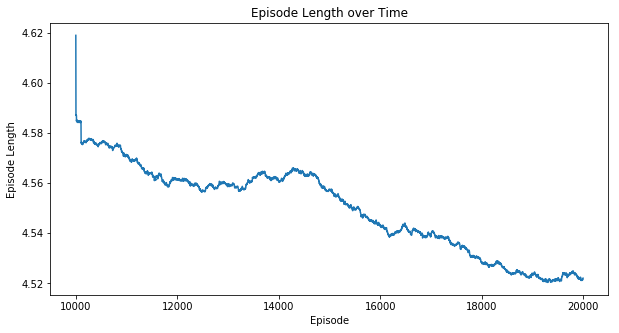

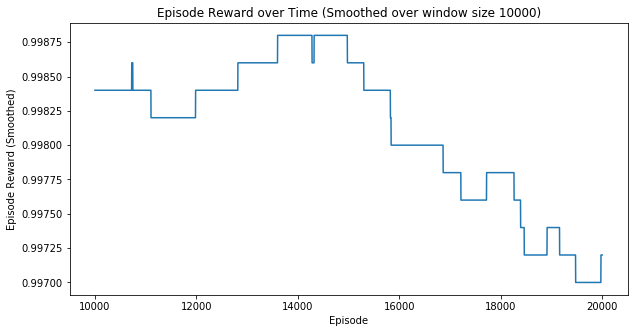

In [24]:
plot_episode_lenth(stats, 10000)
plot_episode_rewards(stats,10000)

In [25]:
"""Evaluate agent's performance after Q-learning"""

total_epochs = 0
episodes = 100
random = False

eval_stats = EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i_episode in range(episodes):
    state = env.reset()
    episode_lenth, rewards = 0, 0
    
    done = False
    
    while not done:
        if random:
            action = agent.get_next_action_random(state)
        else:
            action = agent.get_next_action(state, evaluate = True)
        
        state, reward, done = env.step(action)
        
        rewards += reward
        episode_lenth += 1

    eval_stats.episode_rewards[i_episode] = rewards
    eval_stats.episode_lengths[i_episode] = episode_lenth

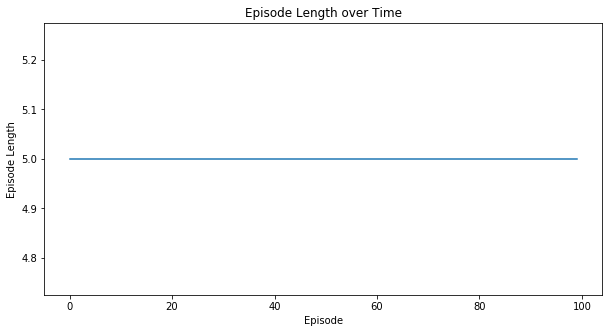

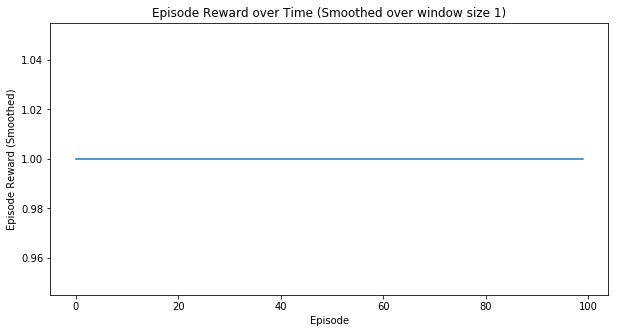

In [27]:
plot_episode_lenth(eval_stats, 1)
plot_episode_rewards(eval_stats, 1)

### Resources

1. [Reinforcement Learning: An Introduction](http://www.incompleteideas.net/book/RLbook2018trimmed.pdf) (Open sourced book by Sutton, R., Barto A.)

2. David Silver’s [lectures](https://www.davidsilver.uk/teaching/) on Reinforcement Learning

3. [Open AI Gym Environments](https://gym.openai.com/)

4. Interesting Read : [Dissecting Reinforcement Learning](https://mpatacchiola.github.io/blog/2016/12/09/dissecting-reinforcement-learning.html) by Massimiliano Patacchiola

### Summary

We have gone through Introduction to Reinforcement Learning and related concepts. By now you will be able to undertand how you can use Q-Learning to solve any environment. You can try solving other environments from OpenAI Gym to cement yourb Q-Learning Fundamentals.

### Future scope:

* We can use Q-Function approximator like DNN to solve similar environments.
* We can go deeped in understanding other policy based Algorithms.

> This tutorial is intended to be a public resource. As such, if you see any glaring inaccuracies or if a critical topic is missing, please feel free to point it out or (preferably) submit a pull request to improve the tutorial. Also, we are always looking to improve the scope of this article. For anything feel free to mail us @ colearninglounge@gmail.com

> Author of this article is Jimish Bhayani. You can follow him on [LinkedIn](https://www.linkedin.com/in/jimishbhayani/).